In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/MyDrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
import mcmc
import SIR_model
import epi_process as ep
import matplotlib.pyplot as plt


In [3]:
import pandas as pd

[10, 17, 69, 146, 179, 129, 82, 36, 12, 5, 1, 0]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


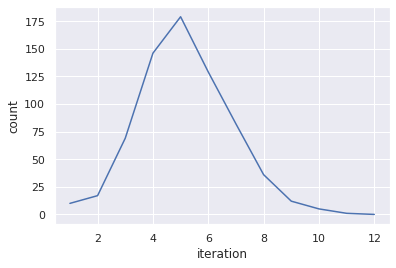

In [8]:
my_proc = ep.EpiProcessViz(1000,1,False)
my_proc.run()
print(my_proc.result)
my_proc.viz_run()

[-15.84, -34.041047039999995, -70.91512361679159, -137.96302441456396, -231.05374374547904, -279.7400843279385, -172.6423212718123, -35.66780553771957, -6.125928536726843, -1.8792799993373812]
25


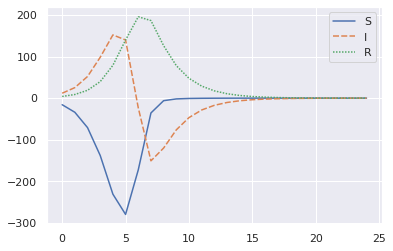

In [5]:
model=SIR_model.SIR(1000,1,100,beta=0.4,gamma=0.1,dt=4)
model.calc()
print(model.result_S[:10])
print(len(model.result_S))
model.viz()

In [10]:
xes=my_proc.result[:10]
my_mcmc=mcmc.MCMC(0.4, 0.1,0.75,xes)
my_mcmc.run(6000)

/content/SIR_model.py:51: RuntimeWarning: overflow encountered in double_scalars
  return (-self.beta * self.S * self.I / self.N) * self.dt
/content/SIR_model.py:55: RuntimeWarning: overflow encountered in double_scalars
  return (self.beta * self.S * self.I / self.N - self.gamma * self.I)*self.dt
/content/SIR_model.py:55: RuntimeWarning: invalid value encountered in double_scalars
  return (self.beta * self.S * self.I / self.N - self.gamma * self.I)*self.dt


-125.01869 -115.66576992415531
-115.66576992415531 -112.14608054805477
-112.14608054805477 -108.78854926995616
-108.78854926995616 -92.78890936856183
-92.78890936856183 -56.680753862588254
-56.680753862588254 -56.055233888323784
-56.055233888323784 -54.70965975400571


In [11]:
my_mcmc.result

[[0.41168442, 0.12708625],
 [0.4212143, 0.12801053],
 [0.46420866, 0.23817267],
 [0.60769427, 0.33654165],
 [0.5887647, 0.35028017],
 [0.60971516, 0.40107718],
 [0.5879083, 0.3703403]]

[-23.281168680000004, -41.9835542190432, -71.96745191409671, -112.37701985194059, -148.69724670621724, -149.7024032140157, -101.7718042785497, -43.71577077326472, -12.142403293411645, -2.5142627340762767]
25


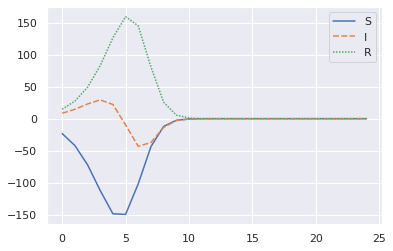

In [13]:
model=SIR_model.SIR(1000,1,100,beta=0.5879083,gamma=0.3703403,dt=4)
model.calc()
print(model.result_S[:10])
print(len(model.result_S))
model.viz()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


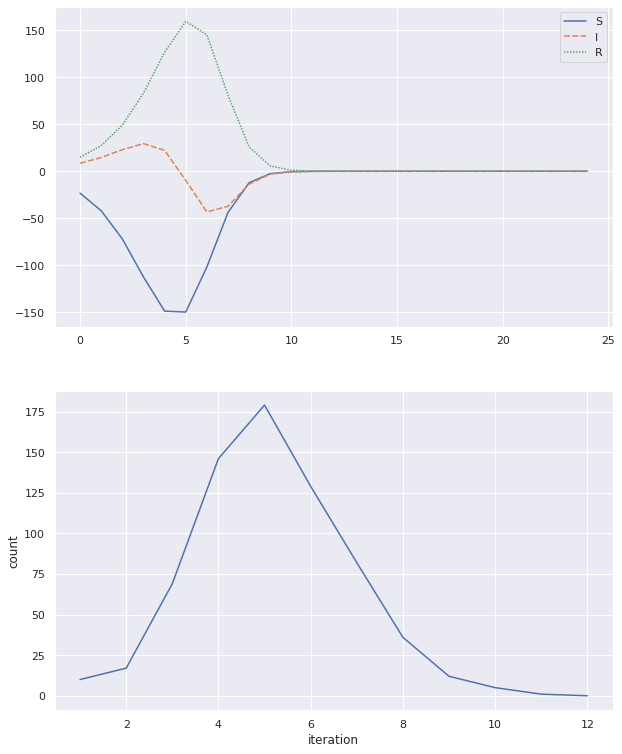

In [21]:
fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(3,1,1)
ax=model.viz()
ax = fig.add_subplot(3,1,2)
ax = my_proc.viz_run()